# Time Series

## مثال اول برای سری زمانی

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/sales_data_for_time_series.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    288 non-null    object 
 1   Sales   285 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


,Date,Sales
0,2000-01-31,925.0
1,2000-02-29,NaN
2,2000-03-31,243.0
3,2000-04-30,810.0
4,2000-05-31,994.0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    288 non-null    datetime64[ns]
 1   Sales   285 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [ ]:
data.set_index('Date', inplace=True)
data

,Sales
Date,
2000-01-31,925.0
2000-02-29,NaN
2000-03-31,243.0
2000-04-30,810.0
2000-05-31,994.0
...,...
2023-08-31,711.0
2023-09-30,357.0
2023-10-31,172.0


In [ ]:
data['Sales'].fillna(data['Sales'].mean(), inplace=True)
data

,Sales
Date,
2000-01-31,925.000000
2000-02-29,496.852632
2000-03-31,243.000000
2000-04-30,810.000000
2000-05-31,994.000000
...,...
2023-08-31,711.000000
2023-09-30,357.000000
2023-10-31,172.000000


In [ ]:
monthly_data = data.resample('M').sum()
monthly_data

,Sales
Date,
2000-01-31,925.000000
2000-02-29,496.852632
2000-03-31,243.000000
2000-04-30,810.000000
2000-05-31,994.000000
...,...
2023-08-31,711.000000
2023-09-30,357.000000
2023-10-31,172.000000


In [ ]:
monthly_data = monthly_data[~monthly_data.index.duplicated(keep='first')]
monthly_data

,Sales
Date,
2000-01-31,925.000000
2000-02-29,496.852632
2000-03-31,243.000000
2000-04-30,810.000000
2000-05-31,994.000000
...,...
2023-08-31,711.000000
2023-09-30,357.000000
2023-10-31,172.000000


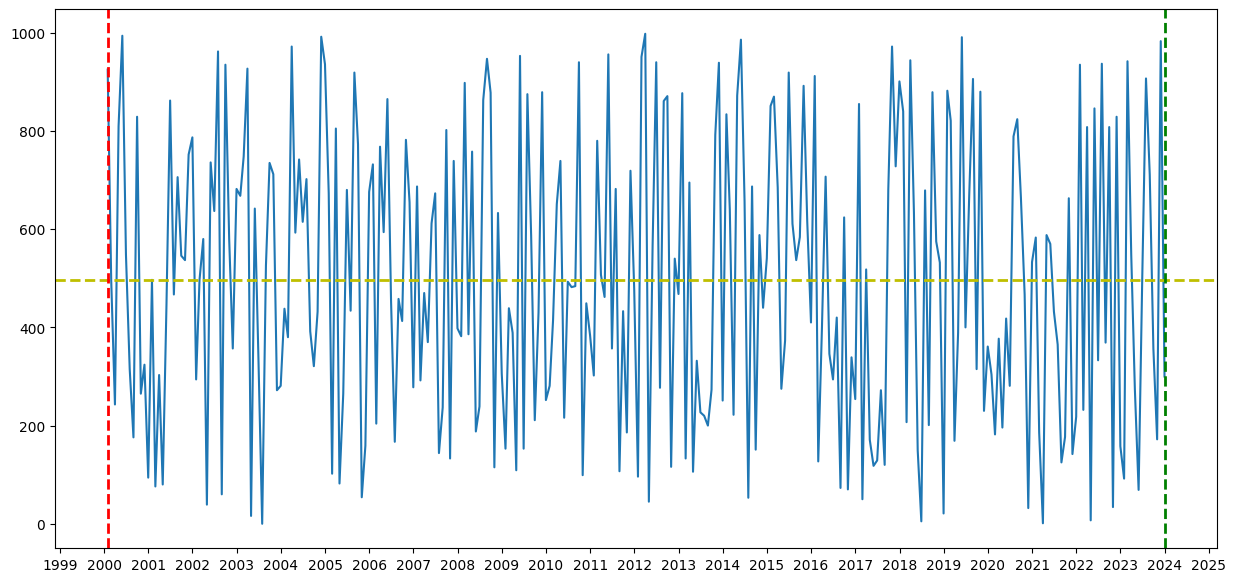

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(monthly_data.index, monthly_data['Sales'])

plt.axhline(y=monthly_data['Sales'].mean(), color='y', linestyle='--', linewidth=2, label='Mean')
plt.axvline(x=monthly_data.index.min(), color='r', linestyle='--', linewidth=2, label='Start')
plt.axvline(x=monthly_data.index.max(), color='g', linestyle='--', linewidth=2, label='End')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

## مثال دوم سری زمانی

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [ ]:
data = {'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
        'Value': [10, 15, 20, 25, 30]
        }
data

In [54]:
df = pd.DataFrame(data)
df

,Date,Value
0,2022-01-01,10
1,2022-01-02,15
2,2022-01-03,20
3,2022-01-04,25
4,2022-01-05,30


In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

In [57]:
df

,Date,Value
0,2022-01-01,10
1,2022-01-02,15
2,2022-01-03,20
3,2022-01-04,25
4,2022-01-05,30


In [58]:
df['Formatted_Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df

,Date,Value,Formatted_Date
0,2022-01-01,10,2022/01/01
1,2022-01-02,15,2022/01/02
2,2022-01-03,20,2022/01/03
3,2022-01-04,25,2022/01/04
4,2022-01-05,30,2022/01/05


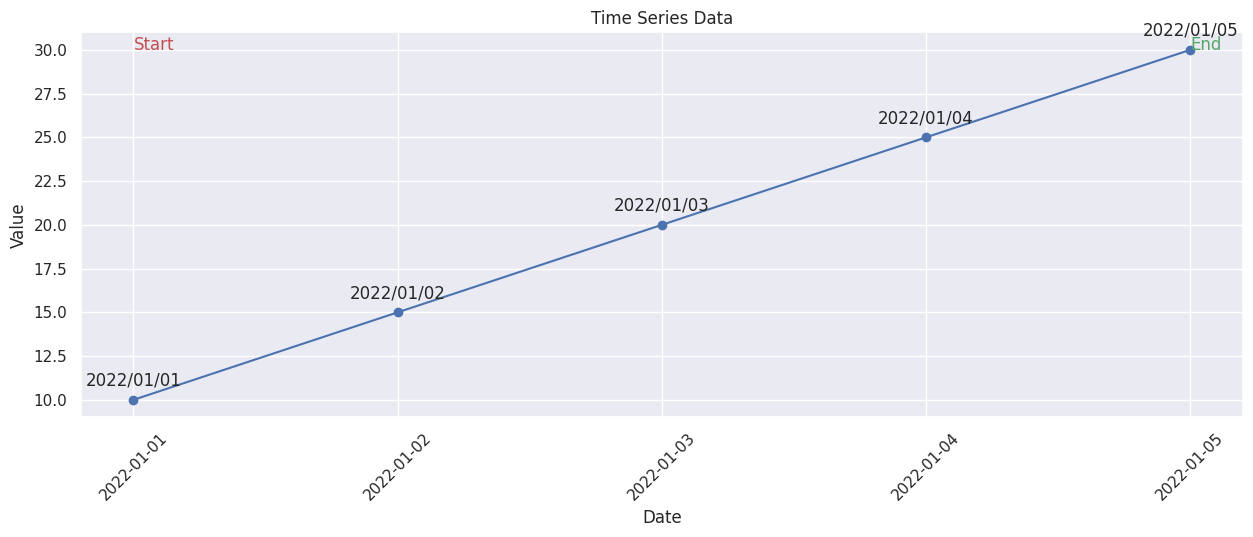

In [63]:
plt.figure(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.plot(df['Date'], df['Value'], marker='o')


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.text(df['Date'].min(), df['Value'].max(), 'Start', color='r' )
plt.text(df['Date'].max(), df['Value'].max(), 'End', color='g')

for i, txt in enumerate(df['Formatted_Date']):
    plt.annotate(txt, (df['Date'][i], df['Value'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## مثال سوم برای سری زمانی

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/DJIA_AMZN_2006-01-01_to_2018-01-01.csv')
df.info()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.Date = pd.to_datetime(df.Date)
df.info()

In [ ]:
df.set_index('Date', inplace = True)
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df_monthly = df.resample('M').mean()
df_monthly.head()

In [ ]:
df_monthly.info()

In [ ]:
df_monthly.describe()

<Axes: xlabel='Date'>

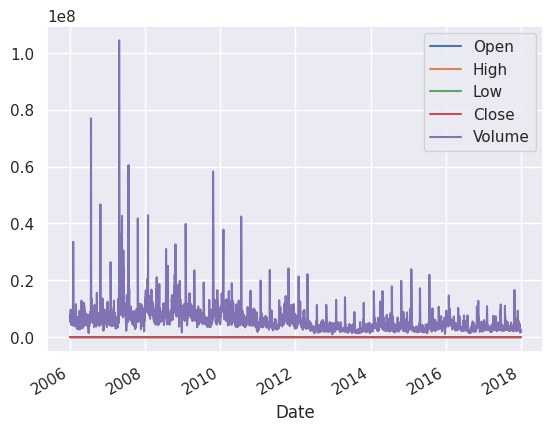

In [94]:
df.plot()

<Axes: xlabel='Date'>

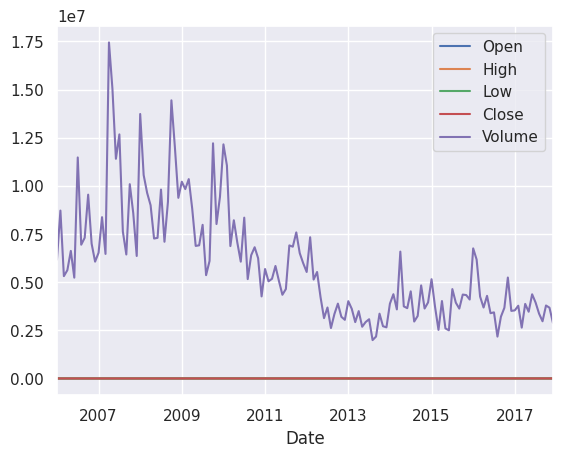

In [95]:
df_monthly.plot()

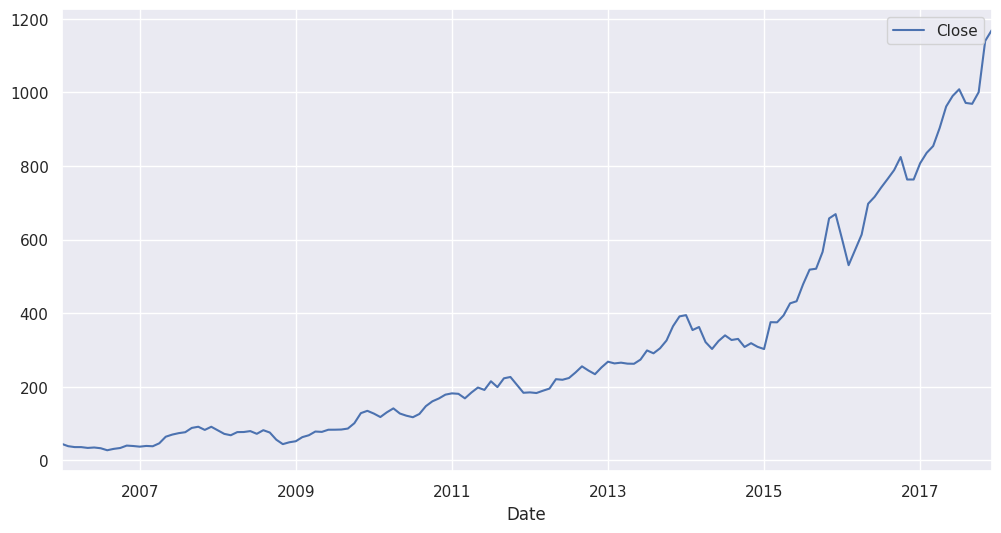

In [96]:
df_monthly['Close'].plot(figsize=(12,6),legend=True)
plt.show()